In [1]:
import hydra
import torch

import pandas as pd
import plotnine as pn

from hydra.core.global_hydra import GlobalHydra

# Lets us import ibsg modules
import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")

from game.game import Game

In [2]:
all_data_fp = "../../analysis_data/all_data.csv"
df = pd.read_csv(all_data_fp)
df

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_24557/1048885480.py:2: DtypeWarning: Columns (10,16,20) have mixed types. Specify dtype option on import or set low_memory=False.


,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,prior,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,ib_bound_function
0,0.094799,0.089899,1.822129,13.320908,0.024299,-0.002262,0.685764,0.0,simulation,NaN,...,-8,10,squared_dist,-1.0,0,replicator_diffusion,-1.0,-1.0,42.0,NaN
1,0.006601,0.002868,1.909160,16.506168,NaN,NaN,NaN,1.0,trajectory,0.0,...,-8,10,squared_dist,-1.0,0,replicator_diffusion,-1.0,-1.0,42.0,NaN
2,0.000610,0.000559,1.911469,15.353169,NaN,NaN,NaN,1.0,trajectory,1.0,...,-8,10,squared_dist,-1.0,0,replicator_diffusion,-1.0,-1.0,42.0,NaN
3,0.000458,0.000432,1.911596,15.016453,NaN,NaN,NaN,1.0,trajectory,2.0,...,-8,10,squared_dist,-1.0,0,replicator_diffusion,-1.0,-1.0,42.0,NaN
4,0.000504,0.000477,1.911550,14.914031,NaN,NaN,NaN,1.0,trajectory,3.0,...,-8,10,squared_dist,-1.0,0,replicator_diffusion,-1.0,-1.0,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191673,0.085732,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,1,500,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo
191674,0.085732,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,1,500,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo
191675,0.085732,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,1,500,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo
191676,0.085732,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,1,500,squared_dist,NaN,0,NaN,NaN,NaN,NaN,embo


In [3]:
def get_df_subsetted_by_meaning_dists(df: pd.DataFrame, curve_metadata) -> pd.DataFrame:
    """Return a subset of the data consistent with the specifications in the curve_metadata config."""

    # See src/get_all_data.py
    universe = df["universe"].astype(str) == str(curve_metadata.universe)
    prior = df["prior"].astype(str) == str(curve_metadata.prior)
    num_signals = df["num_signals"] == curve_metadata.num_signals # this is prob not necessary
    distance = df["distance"] == curve_metadata.distance

    meaning_dist_gamma = df["meaning_dist_gamma"] == curve_metadata.meaning_dist_gamma

    bound_func = df["ib_bound_function"].isin([curve_metadata.ib_bound_function, torch.nan]) # check for 'embo', 'homebuilt' for curves, nan for all simulations since those are curve agnostic.

    df_subsetted = df[universe & prior & num_signals & num_signals & distance & meaning_dist_gamma & bound_func]

    return df_subsetted

In [14]:
overrides = [
    "game.universe=100",
    "game.num_signals=100",
    "game.meaning_dist_gamma=-1",
] # n.b.: do not include multirun overrides, we will filter from columns in the dataframe.

# Global initialization
GlobalHydra.instance().clear() # from previous runs of notebook
hydra.initialize(version_base=None, config_path="../../conf")
config = hydra.compose(
    config_name="config",
    overrides=overrides,
)

curve_metadata = config.game

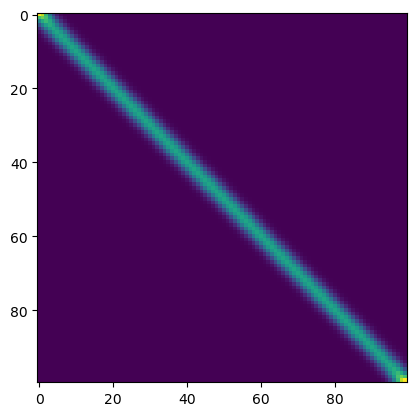

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

game = Game.from_hydra(config, cwd="/Users/nathanielimel/uci/projects/ibsg/data")
plt.imshow(game.meaning_dists)

In [16]:
# visualize the curve!
df = get_df_subsetted_by_meaning_dists(df, curve_metadata)
df

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,prior,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,ib_bound_function
85757,4.638568,3.357914,0.122859,11.527653,0.000977,0.001272,4.387485,0.0,simulation,NaN,...,-8,100,squared_dist,1.0,-1,replicator_diffusion,0.0,-8.0,42.0,NaN
85758,0.000000,0.000000,3.480778,1664.728000,NaN,NaN,NaN,1.0,trajectory,0.0,...,-8,100,squared_dist,1.0,-1,replicator_diffusion,0.0,-8.0,42.0,NaN
85759,0.000000,0.000000,3.480779,1664.669700,NaN,NaN,NaN,1.0,trajectory,1.0,...,-8,100,squared_dist,1.0,-1,replicator_diffusion,0.0,-8.0,42.0,NaN
85760,0.000000,0.000000,3.480778,1664.622100,NaN,NaN,NaN,1.0,trajectory,2.0,...,-8,100,squared_dist,1.0,-1,replicator_diffusion,0.0,-8.0,42.0,NaN
85761,0.000000,0.000000,3.480776,1664.580400,NaN,NaN,NaN,1.0,trajectory,3.0,...,-8,100,squared_dist,1.0,-1,replicator_diffusion,0.0,-8.0,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169626,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,-8,100,squared_dist,NaN,-1,NaN,NaN,NaN,NaN,embo
169627,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,-8,100,squared_dist,NaN,-1,NaN,NaN,NaN,NaN,embo
169628,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,-8,100,squared_dist,NaN,-1,NaN,NaN,NaN,NaN,embo
169629,6.643856,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,mse_bound,NaN,...,-8,100,squared_dist,NaN,-1,NaN,NaN,NaN,NaN,embo


In [17]:
df_final_points = df[df["point_type"] == "simulation"]
df_curve_points = df[df["point_type"] == "ib_bound"]

In [20]:
df_final_points

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,prior,num_signals,distance,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,ib_bound_function
85757,4.638568,3.357914,0.122859,11.527653,0.000977,0.001272,4.387485,0.0,simulation,NaN,...,-8,100,squared_dist,1.0,-1,replicator_diffusion,0.0,-8.0,42.0,NaN


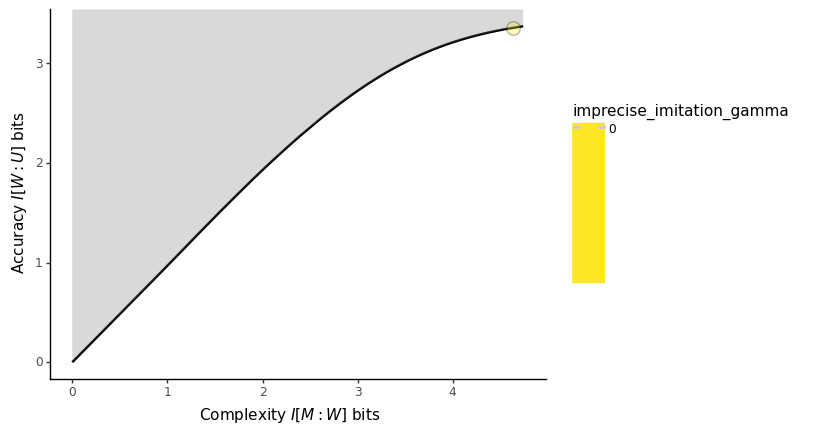

In [18]:

# Make a plot for each meaning_dist_gamma
plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_curve_points, mapping=pn.aes(x="complexity", y="accuracy")
    )  
    + pn.geom_line(size=1) # IB curve
    # + pn.geom_point(size=1)
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=torch.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # emergent langs
        data=df_final_points,
        mapping=pn.aes(
            # fill="discriminative_need_gamma",
            fill="imprecise_imitation_gamma",
            # fill="population_init_gamma",
            ),
        alpha=0.3,
        size=5,
    )        
    + pn.xlab("Complexity $I[M:W]$ bits")
    + pn.ylab("Accuracy $I[W:U]$ bits")
    + pn.theme_classic()
)
print(plot)